<a href="https://colab.research.google.com/github/suwatoh/Python-learning/blob/main/131_HTTP%E3%82%AF%E3%83%A9%E3%82%A4%E3%82%A2%E3%83%B3%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HTTP クライアント
=================

HTTP
----

**HTTP**（Hypertext Transfer Protocol）とは、 Web サーバーと Web クライアントの間でデータの送受信を行うために用いられるプロトコル（通信規約）である。 [IETF](https://ja.wikipedia.org/wiki/Internet_Engineering_Task_Force) を始めとした標準化団体により標準化されている。HTTP にはいくつかのバージョンがあり、現在は HTTP/1.1 と HTTP/2 が広く利用されている。最新バージョンは、HTTP/3。URL のスキーム `http` は、この HTTP でリソースにアクセスすることを表す。

HTTP 通信は、TCP のポート番号 80 をデフォルトとして使用する。

HTTP には通信の暗号化についての仕様がないため、データの伝送途上で盗み見られたり内容をすり替えられる危険がある。このため、TLS（Transport Layer Security）と呼ばれる暗号化されたデータの通信路で HTTP 通信を行う方式がとられるようになっている。TLS と組み合わせた HTTP 通信の方式は **HTTPS** と呼ばれ、ポート番号 443 を使用する。URL のスキーム `https` は、HTTPS でリソースにアクセスすることを表す。

HTTP では通信を開始できるのはクライアント側のみであり、クライアントからサーバーにデータを要求し、サーバーが応答を返すのが最も典型的な HTTP のやりとりである。このクライアントからの要求を **HTTP リクエスト**と呼び、サーバーの応答を **HTTP レスポンス**と呼ぶ。HTTP 通信の基本は、HTTP リクエストと HTTP レスポンスという 1 往復のやりとりを必要に応じて繰り返す。

HTTP メソッドと Web API
-----------------------

HTTP リクエストの種類は、**メソッド**として次のように整理される。

| メソッド | 意味 |
|:---|:---|
| `GET` | リソースの取得 |
| `POST` | データの送信（サーバー上の状態を変更したり、副作用が発生したりすることがよくある） |
| `HEAD` | ヘッダーの取得（`GET` リクエストと同じレスポンスを、コンテンツなしで求める） |
| `PUT` | リソースの作成・更新 |
| `DELETE` | リソースの削除 |
| `CONNECT` | プロキシサーバー（代理サーバー）経由での通信 |
| `OPTIONS` | サーバーの可能な通信オプションの情報の取得 |
| `TRACE` | サーバーまでのネットワーク経路の確認 |

実際の HTTP 通信では `GET` と `POST` メソッドが大部分を占める。一方、 Web サーバーによっては、標準の HTTP メソッド以外のメソッドを受け付けるものがある。`PATCH` メソッドはそのようなメソッドの 1 つで、リソースの部分的な更新を意味する。

Web サーバーによっては、URL と HTTP リクエストと HTTP レスポンスの内容や手順に関する規約が公開されている場合があり、これを **Web API** と呼ぶ。Web API を提供している Web サーバー側では、リソースごとにベースとなる URL を公開している。これを**エンドポイント**（endpoint）と呼ぶことがある。ユーザーが Web API にアクセスするときは、この URL に所定の HTTP メソッドで Web サーバーにリクエストを行う。

[httpbin.org](https://httpbin.org/) は、HTTP リクエストのテストやデバッグのために設計された無料のウェブサービスで、さまざまな HTTP メソッドをテストするための Web API を公開している。エンドポイントは次のとおり。

| メソッド | エンドポイント |
|:---|:---|
| `GET` | `'https://httpbin.org/get'` |
| `POST` | `'https://httpbin.org/post'` |
| `PUT` | `'https://httpbin.org/put'` |
| `PATCH` | `'https://httpbin.org/patch'` |
| `DELETE` | `'https://httpbin.org/delete'` |

httpbin.org の Web API では、レスポンスのデータ形式が JSON 形式となる。

ステータスコード
----------------

HTTP レスポンスの種類は、**ステータスコード**として整理される。ステータスコードは、3 桁の数字からなり、おおまかな分類が以下となる:

| ステータスコード | 意味 |
|:--:|:---|
| 1xx | Informational: リクエストは受け取られ、処理が継続 |
| 2xx | Success: リクエストに成功 |
| 3xx | Redirection: リダイレクトや移行など、リクエストの完了には追加的な処理が必要 |
| 4xx | Client Error: クライアントからのリクエストに誤りあり |
| 5xx | Server Error: サーバー側でリクエストの処理に失敗 |

ステータスコードには、ステータスコードの意味を簡潔に表現する固有の文字列が付随する。これは**リーズンフレーズ**(reason phras)と呼ばれる。代表的なものは以下のとおり:

  * `200 OK`: リクエストが正常に処理できた
  * `201 Created`: 作成した（リクエストは完了し、新たに作成されたリソースの URI が返される）
  * `301 Moved Permanently`: 恒久的に移動した（リクエストしたリソースが恒久的に移動されているときに返される）
  * `302 Found`: 発見した（リクエストしたリソースが一時的に移動されているときに返される）
  * `303 See Other`: 他を参照せよ（リクエストに対するレスポンスが他の URL に存在するときに返される）
  * `304 Not Modified`: リクエストしたリソースは更新されていない
  * `307 Temporary Redirect`: 同じメソッドで再リクエストが必要（リクエストしたリソースが一時的に移動されているときに返される）
  * `308 Permanent Redirect`: 同じメソッドで再リクエストが必要（リクエストしたリソースが恒久的に移動されているときに返される）
  * `400 Bad Request`: リクエストが不正である
  * `403 Forbidden`: リソースにアクセスすることを拒否された
  * `404 Not Found`: リソースが見つからなかった
  * `405 Method Not Allowed`: 許可されていないメソッドを使用しようとした
  * `429 Too Many Requests`: リクエストが多すぎる（短時間に大量のリクエストを送信してきたため、サーバーが処理を拒否する場合）
  * `500 Internal Server Error`: サーバー内部にエラーが発生した
  * `501 Not Implemented`: 実装されていないメソッドを使用した
  * `503 Service Unavailable`: サーバーが一時的に使用できない

HTTP メッセージ
---------------

HTTP リクエストと HTTP レスポンスを行う手段は、**HTTP メッセージ**と呼ばれる。HTTP メッセージの構成は、HTTP バージョンによって微妙に異なる。 HTTP/1.1 では HTTP メッセージはテキスト形式であり、改行をもって 1 行ごとに区切られ、次のような構成となる。

``` text
  HTTP メッセージ
┏━━━━━━━━━━━━━━━━━━━┓
┃┌─────────────────┐┃
┃│リクエストライン/ステータスライン │┃ ヘッダーセクション
┃├─────────────────┤┃
┃│ヘッダーフィールド                │┃
┃│ヘッダーフィールド                │┃
┃│ヘッダーフィールド                │┃
┃└─────────────────┘┃
┃ （空行; CR+LF）                      ┃
┃┌─────────────────┐┃
┃│コンテンツ                        │┃
┃├─────────────────┤┃
┃│トレーラーフィールド              │┃ トレーラーセクション
┃│トレーラーフィールド              │┃
┃│トレーラーフィールド              │┃
┃└─────────────────┘┃
┗━━━━━━━━━━━━━━━━━━━┛
```

ヘッダーフィールドは単にヘッダーとも呼ばれる。コンテンツはペイロード、またはメッセージボディ、あるいは単にボディとも呼ばれる。トレーラーフィールドも単にヘッダーとも呼ばれる。

改行は CR+LF（`\r\n`）。ヘッダーセクションとコンテンツの間は、空行（つまり改行 2 つ）で区切られる。ただし、ヘッダーセクションは必須だが、コンテンツとトレーラーセクションは存在しないことがある（トレーラフィールドはほとんど使われていない）。

HTTP リクエストでは、1 行目がリクエストラインであり、HTTP メソッド、サーバー上のリソースを識別するためのパス、HTTP バージョンが次のように記述される:

``` text
GET / HTTP/1.1\r\n
```

このリクエストラインは、HTTP メソッドが `GET` で、対象とするパスとしてルート `/` を指定している。

HTTP レスポンスでは、1 行目がステータスラインであり、HTTP バージョン、ステータスコード、リーズンフレーズが次のように記述される:

``` text
HTTP/1.1 200 OK\r\n
```

このステータスラインは、ステータスコード/リーズンフレーズが `200 OK` であり、リクエストが正常に処理できたことを示す。

HTTP メッセージの 2 行目以降では、次のように構成されるヘッダーフィールドが並ぶ。

``` text
フィールド名: 値[; パラメータ名=値[; パラメータ名=値...]][, 値[; パラメータ名=値[; パラメータ名=値...]], ...]\r\n
```

フィールド名は、大文字小文字を区別しない。フィールドの値は複数を受け付ける場合があり、その場合にはカンマ区切りで指定する。パラメータ（属性とも呼ばれる）を受け付ける場合があり、その場合には各値の後ろにセミコロンと空白 `'; '` で区切ってパラメータ名と値のペアを `=` を挟む形で並べる。

基本的なヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | パラメータ | 意味 |
|:---|:---|:---|:---|
| `Host` | `<host>:<port>` | | 【リクエスト専用】リクエストが送信される先のサーバーのホスト名とポート番号を指定する |
| `User-Agent` | `<product>/<version><comment>` | | 【リクエスト専用】リクエストしているアプリケーション（ユーザーエージェント）の製品情報 |
| `Referer` | `<url>` | |【リクエスト専用】リクエスト中のページにつながるリンクがある直前のページのアドレスを<br /><br />伝える。サーバー側でユーザーの行動分析に利用される。HTTPS 通信でない場合は送信<br /><br />されない |
| `Origin` | `null`<br /><br />`<scheme>://<hostname>`<br /><br />`<scheme>://<hostname>:<port>` | |【リクエスト専用】関連するリクエストが発生したスキーム、ホスト名、ポート番号を伝える。<br /><br />現在と同一なら `null` や省略されることもある |
| `Accept` | `<MIME_type>/<MIME_subtype>` | `q` | 【リクエスト専用】クライアントが受け入れ可能なコンテンツの MIME タイプを指定する。サ<br /><br />ブタイプを指定しない形式 `<MIME_type>/*` や 全ての MIME タイプ `*/*` も指定可能。複<br /><br />数指定可能で、その場合 `q` に重み（優先度）を `0` から `1` までの範囲で指定できる |
| `Accept-Language` | `<language>`<br /><br />`*` | `q` | 【リクエスト専用】クライアントが受け入れ可能な言語（`ja`, `en-US` など）を指定する。複数<br /><br />指定可能で、その場合 `q` に重み（優先度）を `0` から `1` までの範囲で指定できる |
| `Accept-Encoding` | `gzip`<br /><br />`compress`<br /><br />`deflate`<br /><br />`br`<br /><br />`identity`<br /><br />`*` | `q` | 【リクエスト専用】クライアントが受け入れ可能なコンテンツの圧縮アルゴリズムを指定する。<br /><br />`identity` は等価関数（つまり圧縮なし）を示す。複数指定可能で、その場合 `q` に重み（優<br /><br />先度）を `0` から `1` までの範囲で指定できる |
| `Range` | `bytes=<start>-<end>,...`<br/><br />`bytes=-<suffix-length>` | | 【リクエスト専用】リソースの一部を要求する。`bytes` で単位を、整数値 `<start>` で範囲<br /><br />の先頭を、整数値 `<end>` で範囲の末尾を示す。`<start>-` として `<end>` を省略すれば<br /><br />リソースの末尾が範囲の末尾となる。負の整数値 `-<suffix-length>` でファイルの末尾<br /><br />からの範囲を指定できる。カンマ区切りで複数の範囲を指定可能 |
| `Accept-Ranges` | `bytes`<br /><br />`none` | | 【レスポンス専用】値が `bytes` ならサーバーがリソースの一部だけのリクエストに対応して<br /><br />いることを示す。値が `none` ならそのようなリクエストに対応していないことを示す |
| `Server` | `<product>` | | 【レスポンス専用】レスポンスを生成したサーバーで使用されたソフトウェア |
| `Retry-After` | `<http-date>`<br /><br />`<delay-seconds>` | | 【レスポンス専用】ステータスコード 503, 429, 301 の場合に、ユーザーエージェントがリクエ<br /><br />ストを再送する前にどれくらい待つべきかを示す。RFC-1123 形式の日時、または遅延させ<br /><br />る秒数（10 進数の整数） |
| `Connection` | `keep-alive`<br /><br />`close` | | 値が `keep-alive` なら接続が維持されて閉じられなくなる。値が `close` なら接続が閉じ<br /><br />られる |

古い HTTP/1.0 では、HTTP リクエストと HTTP レスポンスの 1 往復が終わると TCP 接続が閉じられるのがデフォルトの動作であった。複数回の往復が必要な場合に、リクエストのたびに TCP 接続を確立させるのは効率が悪いので、HTTP/1.1 ではデフォルトで接続が維持され、接続の維持を望まなければヘッダーフィールドに `'Connection: close'` を追加する仕様となっている（`'Connection: keep-alive'` はデフォルトの動作となったので明示的な指定を省略できる）。

コンテンツに関する情報を与えるヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | パラメータ | 意味 |
|:---|:---|:---|:---|
| `Content-Disposition` | `inline`<br /><br />`attachment` | `filename` | 【レスポンス専用】値が `inline`（デフォルト）なら、コンテンツは Web ページとして表示される。値が<br /><br /> `attachment` なら、コンテンツはファイルとしてダウンロードされる。パラメータの `filename` に保存<br /><br />するファイル名のデフォルト値を指定できる |
| `Content-Type` | `<media-type>` | `charset`<br /><br />`boundary` | コンテンツの MIME タイプを指定する。`charset` にコンテンツの文字エンコーディングを指定できる。<br /><br />マルチパートのコンテンツでは `boundary` が必要で、これは複数パートの境界を囲むために使用する |
| `Content-Length` | `<length>` | | コンテンツの長さをバイト単位で示す |
| `Transfer-Encoding` | `chunked` | | ストリームデータ等、事前にデータの長さを知ることができない場合に、`Content-Length` を省略する<br /><br />代わりに `'Transfer-Encoding: chunked'` を含めてデータがチャンクの連続で送られることを示す |

`GET` リクエストは、リソースの取得専用とみなされ、コンテンツを入れないとされている（サーバーは `GET` リクエストのコンテンツを無視する）。このため、パラメータは URL のクエリ文字列で渡すのが一般的である。このことは、HTML フォームの場合でも同様とされる。

例えば、いま Web ブラウザが次のような HTML フォームを含む Web ページを読み込んでいるとする:

``` html
<form method="GET" action="article">
  <label>Name: <input type="text" name="name" /></label>
  <label>Email: <input type="text" name="email" /></label>
  <button>送信</button>
</form>
```

Web ブラウザ上には 1 行の入力欄 2 つと送信ボタン 1 つが表示される。`form` 要素の `method` 属性が `GET` になっているので、送信ボタンを押すと、`GET` リクエストが発行される。このとき、`?name=John&email=John%40example.com` のようなクエリ文字列付きの URL でサーバーに送信され、そのメッセージにはコンテンツは含まれない（ヘッダーセクションのみ送信）。

`POST` リクエストの場合は、作成したリソースや結果の情報をコンテンツに含めて送信するのが一般的である。上記の例と似た状況で、ただ HTML フォームが次のようなものであったとする:

``` html
<form method="POST" action="article">
  <label>Name: <input type="text" name="name" /></label>
  <label>Email: <input type="text" name="email" /></label>
  <button>送信</button>
</form>
```

Web ブラウザ上の表示は同じだが、`form` 要素の `method` 属性が `POST` になっているので、送信ボタンを押すと、`POST` リクエストが次のような構成でサーバーに送信される:

``` text
POST /article HTTP/1.1
Host: example.com
Content-Type: application/x-www-form-urlencoded
Content-Length: 34

name=John&email=John%40example.com
```

空行の下にコンテンツが入り、それは URL のクエリ文字列と同じ形式となる。URL エンコードもされており、そのことを示すため、ヘッダー `'Content-Type: application/x-www-form-urlencoded'` が追加される。フォームデータに適用される変換を**フォームエンコード**という。

ファイルを送信する `POST` リクエストでは、コンテンツはマルチパートとなる。

``` text
POST /upload HTTP/1.1
Host: example.com
Content-Type: multipart/form-data; boundary=------WebKitFormBoundaryX3bY6
Content-Length: [バイト数]

------WebKitFormBoundaryX3bY6
Content-Disposition: form-data; name="name"

[テキストデータの内容]
------WebKitFormBoundaryX3bY6
Content-Disposition: form-data; name="file"; filename="image.jpg"
Content-Type: image/jpeg

[バイナリデータ]
------WebKitFormBoundaryX3bY6--
```

`Content-Length` ヘッダーが省略されて、`Transfer-Encoding: chunked` が指定された場合、コンテンツはチャンク単位で送られる。チャンクでは、最初にチャンク単位のサイズ（バイト数）を 16 進数で示し、改行してチャンクのデータを送る。データ転送が完了したら空のチャンク（サイズを `0` とし、データを空行 `'\r\n'`とする）を送る。

``` text
HTTP/1.1 200 OK
Server: example
Transfer-Encoding: chunked

64
<チャンクデータ>
1D
<チャンクデータ>
0

```

HTTP には、**キャッシュ**という、「一度取得したリソース（HTMLや画像、CSS、JavaScriptなど）を再利用する仕組み」がある。同じリソースを再取得せずに再利用することで、通信量を減らし表示速度を向上させ、サーバーやネットワークの負荷を軽減する。

HTTP キャッシュには大きく分けて 2 つの種類がある:

  * **ブラウザキャッシュ（プライベートキャッシュ）**  
ブラウザやアプリが保持するキャッシュ。一度取得したリソースをローカルストレージに保存し、次回アクセス時に利用する。
  * **プロキシキャッシュ（共有キャッシュ）**  
ISP や CDN、企業内ネットワークのプロキシサーバーなどで利用されるキャッシュ。複数ユーザーで共有される。

さらに、サーバーへの確認の有無により、次のように分類される:

  * **強いキャッシュ（Strong Caching）**  
Web ブラウザがキャッシュを「期限切れになるまでサーバーに確認せず」利用する。
  * **弱いキャッシュ（Validation Caching）**  
サーバーに確認して最新かどうかをチェックし、更新されていなければキャッシュを使う。

キャッシュに関するヘッダーフィールドは、以下の通り:

| フィールド名 | 値 | 意味 |
|:---|:---|:---|
| `Last-Modified` | `<http-date>` | 【レスポンス専用】リソースの最終更新日時を RFC-1123 形式で伝える |
| `ETag` | `<hash-value>` | 【レスポンス専用】リソースのハッシュ値を伝える |
| `Expires` | `<http-date>` | 【レスポンス専用】RFC-1123 形式で指定された日時までクライアントにキャッシュを使わせることを伝える。<br /><br />`Last-Modified` や `ETag` と違ってクライアントの HTTP リクエストを抑制できる（強いキャッシュ）。`Expires` は<br /><br /> `Last-Modified` や `ETag` より優先される |
| `Date` | `<http-date>` | 【レスポンス専用】レスポンス生成日時を RFC-1123 形式で伝える。キャッシュの鮮度計算に使われる |
| `Age` | `<delta-seconds>` | 【レスポンス専用】リソースがプロキシのキャッシュに入ってからの経過時間（秒）。キャッシュサーバー（プロキシや<br /><br /> CDN など）がレスポンスを返すときに付与 |
| `Vary` | `<header-name>, ...` | 【レスポンス専用】同じ URL でも指定されたリクエストヘッダーの値が異なる場合にレスポンスのコンテンツが変<br /><br />わることを伝える。`Accept-Language` や `Accept-Encoding` や `User-Agent` を指定すれば、キャッシュは言語、圧<br /><br />縮アルゴリズム、デバイスごとに別々のレスポンスを保存する |
| `If-Modified-Since` | `<http-date>` | 【リクエスト専用】例えばサーバーから `'Last-Modified: Wed, 14 Oct 2020 15:00:00 GMT'` が含まれるレスポ<br /><br />ンスを受けたクライアントは、同じリソースに対してリクエストを発行するときは<br /><br /> `'If-Modified-Since: Wed, 14 Oct 2020 15:00:00 GMT'` を含める。サーバーはその日時以降にリソースの更<br /><br />新がなければ `'304 Not Modified'` を返してクライアントにキャッシュを使わせる |
| `If-None-Match` | `<hash-value>` | 【リクエスト専用】サーバーから `'ETag: "XXX"'` が含まれるレスポンスを受けたクライアントは、同じリソースに対<br /><br />してリクエストを発行するときは `'If-None-Match: "XXX"'` を含める。サーバーはリソースのハッシュ値と送られ<br /><br />てきたハッシュ値が一致すれば `'304 Not Modified'` を返してクライアントにキャッシュを使わせる |
| `Cache-Control` | `no-store`<br /><br />`no-cache`<br /><br />`max-age=N`<br /><br />`private` | キャッシュの有効期限や挙動を細かく指定する。`Cache-Control` は `Expires` より優先される<br /><br />【レスポンス】<br /><br />・`'Cache-Control: no-store'` を含むレスポンスを受けたクライアントは、キャッシュを利用せず、同じリソースに<br /><br />　対してリクエストを発行する時は常に `If-Modified-Since` や `If-None-Match`を含めない<br /><br />・`'Cache-Control: no-cache'` を含むレスポンスを受けたクライアントは、同じリソースに対してリクエストを発行<br /><br />　する時は `If-Modified-Since` や `If-None-Match` ヘッダーを付けて、サーバーにこれらの値を使ってキャッシュ<br /><br />　を使うかどうかを判断させることができる<br /><br />・`'Cache-Control: max-age=N'` を含むレスポンスを受けたクライアントは、`N` 秒間は HTTP リクエストを行わず、<br /><br />　キャッシュを使う<br /><br />・値に `private` を単独または上記の指定と合わせて指定した時は、キャッシュをプライベートキャッシュでのみ許<br /><br />　可し、共有キャッシュには保存しないよう要求する<br /><br />【リクエスト】<br /><br />・`'Cache-Control: no-store'` を含むリクエストを受けたサーバーは、常に最新のリソース本体を含むレスポンス<br /><br />　を返す |

HTTP にはクライアントに別の URL へ再リクエストを行わせる仕組みがあり、**リダイレクト**と呼ばれる。リダイレクトは、サーバーが HTTP レスポンスで 3xx 系ステータスコードと新しい URL を示す次のヘッダーを返すことで行われる。

| フィールド名 | 値 | 意味 |
|:---|:---|:---|
| `Location` | `<url>` | 【レスポンス専用】リダイレクト先の URL を示す |

ログインを必要とする Web サイトでは、ID を使ってユーザーを特定する。この仕組みを**セッション**（session）という。

HTTP はリクエストとレスポンスが一回で完結し、状態を保持しないプロトコルなので、一度の通信が終わると、サーバーは「同じ人かどうか」を覚えていない。このままではユーザーはセッションを継続できず、通信のたびにログイン処理が必要となる。そこで、サーバー・クライアント間でやり取りされる、ユーザーを識別するための小さなデータ（キーと値のペア）が利用される。これを **Cookie** という。

Cookie のやりとりは以下のヘッダーフィールドで行われる。

| フィールド名 | 値 | パラメータ | 意味 |
|:---|:---|:---|:---|
| `Set-Cookie` | `<key>=<value>` | `Expires`<br /><br />`Max-Age`<br /><br />`Domain`<br /><br />`Path`<br /><br />`Secure`<br /><br />`HttpOnly`<br /><br />`SameSite` | 【レスポンス専用】サーバーから Cookie を送信する。複数の Cookie を送信するには、複数の `Set-Cookie` ヘッ<br /><br />ダーを 1 つのレスポンスで送信する。Cookie を受け取ったクライアントは次回のリクエスト時に Cookie を送り返す<br /><br />が、パラメータでこれを制御することができる<br /><br />・`Expires`: Cookie の有効期限（日時）を RFC-1123 形式で指定する<br /><br />・`Max-Age`: Cookie の期限までの秒数を指定する。`Expires` も `Max-Age` も指定されない Cookie は Web ブラウ<br /><br />　ザの終了時に削除される<br /><br />・`Domain`: Cookie を送信するドメインの制限を指定する<br /><br />・`Path`: Cookie を送信するパスの制限を指定する<br /><br />・`Secure`: HTTPS 通信が行われる場合にのみサーバーに Cookie を送信するように指定する（`Secure` には値は<br /><br />　不要）<br /><br />・`HttpOnly`: クライアント側で JavaScript から Cookie にアクセスできないように指定する（`HttpOnly` には値は<br /><br />　不要）<br /><br />・`SameSite`: `Strict`, `Lax`, `None` のいずれかを指定。`Strict` の場合、同一サイトのリクエストに対してのみ<br /><br />　 Cookie を送信する。`Lax` の場合、元のサイトに移動する時にも Cookie を送信する。`None` の場合、そのような<br /><br />　制限はない |
| `Cookie` | `<cookie-list>` | | 【リクエスト専用】クライアント側に保存された Cookie をサーバーに送信する。複数の Cookie を送信するには 1 つ<br /><br />の `Cookie` ヘッダーにセミコロンと空白 `'; '` で区切って並べた Cookie のリストを指定する。なお、クライアント<br /><br />が Cookie を送り返すのは任意である。例えば、ブラウザーのプライバシー設定で Cookie をブロックしている場合<br /><br />は `Cookie` ヘッダーを省略する |

例えば、ユーザーのログイン時に、サーバーは認証したユーザーにセッション ID を発行して次のように `Set-Cookie` ヘッダーに含める。

``` text
Set-Cookie: sessionId=38afes7a8
```

Web ブラウザはセッション ID を保管し、次回の HTTP リクエスト時に次のように `Cookie` ヘッダーにセッション ID を含めることによって、ログインが不要となる。

``` text
Cookie: sessionId=38afes7a8
```

`curl` コマンドを `-v` オプションを付けて実行することで、実際にやり取りされる HTTP メッセージを確認することができる。例えば、`curl -v http://example.com` コマンドを実行すると、`example.com` に対して `GET` リクエストを発行し、そのレスポンスとして HTML 形式が返されることを確認できる。

In [ ]:
!curl -v http://example.com

*   Trying 23.192.228.80:80...
* Connected to example.com (23.192.228.80) port 80 (#0)
> GET / HTTP/1.1
> Host: example.com
> User-Agent: curl/7.81.0
> Accept: */*
> 
* Mark bundle as not supporting multiuse
< HTTP/1.1 200 OK
< Content-Type: text/html
< ETag: "84238dfc8092e5d9c0dac8ef93371a07:1736799080.121134"
< Last-Modified: Mon, 13 Jan 2025 20:11:20 GMT
< Cache-Control: max-age=2692
< Date: Thu, 10 Apr 2025 00:44:37 GMT
< Content-Length: 1256
< Connection: keep-alive
< 
<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {


urllib.request
--------------

Python では、HTTP/1.1 を使用する HTTP クライアント機能が標準ライブラリの `http.client` モジュールと `urllib.request` モジュールで提供されている。`http.client` は HTTP 接続に近い低水準のインターフェースを提供していて、`urllib.request` は `http.client` の上に構築された高水準なインターフェースを提供している。よって、通常は `urllib.request` を使う。

`urllib.request.Request` クラスは、リクエストを表現する。コンストラクタは次のとおり。

``` python
urllib.request.Request(url, data=None, headers={}, origin_req_host=None, unverifiable=False, method=None)
```

| 引数 | 意味 |
|:---|:---|
| `url` | 適切にエンコードされた有効な URL を含む文字列を指定する。スキームについては `http`、`https` だけでなく、`ftp` と `file` にも対応している |
| `data` | サーバーに送信する追加データを指定するオブジェクト、またはそのようなデータが不要な場合は `None` とする必要がある。サポートされているオ<br /><br />ブジェクトの型は、バイト列、ファイルオブジェクト、およびバイト列のイテラブル |
| `headers` | ヘッダーフィールドを `{フィールド名: 値, ...}` となる辞書で指定する |
| `method` | HTTP メソッドを示す文字列を指定する。指定された場合、その値は `method` 属性に格納される |

`urllib.request.Request` の主な属性は次の通り。

| 属性 | 意味 |
|:---|:---|
| `Request.full_url` | コンストラクタに渡されたオリジナルの URL |
| `Request.data` | リクエストのボディ。コンストラクタの引数 `data` で指定されない場合は `None` になる |
| `Request.headers` | リクエストのヘッダーフィールドを示す辞書。コンストラクタの引数 `headers` で指定されない場合は空の辞書になる |
| `Request.method` | HTTP リクエストで使うメソッド |

`urllib.request.Request` の主なメソッドは次の通り。

| 属性 | 意味 | 戻り値 |
|:---|:---|:---|
| `Request.get_method()` | HTTP リクエストメソッドを示す文字列を返す。`Request.method` 属性が `None` でなければその値を返す。<br /><br />そうでない場合、`Request.data` が `None` なら `'GET'` を、そうでなければ `'POST'` を返す | `str` |

``` python
urllib.request.urlopen(url, data=None, [timeout, ]*, context=None)
```

この関数は、URL を開く。つまり、URL のホスト（Web サーバー、FTP サーバーなど）に URL のポート番号で接続して、URL のパスへリクエストを発行し、サーバーからレスポンスが返ってくるのを待つ。その HTTP リクエストは `Connection:close` ヘッダーを含む。

| 引数 | 意味 |
|:---|:---|
| `url` | `urllib.request.Request` コンストラクタの引数 `url` に渡す文字列を指定する。または、直接 `urllib.request.Request` インスタンスを指定するこ<br /><br />ともできる |
| `data` | `urllib.request.Request` コンストラクタの引数 `data` に渡すオブジェクトを指定する。`url` に直接 `urllib.request.Request` インスタンスを指定<br /><br />する場合は、この `data` 引数を省略する |
| `timeout` | サーバーからレスポンスが返ってくるまで待つ最大時間を秒数で指定する |
| `context` | キーワード専用引数。HTTPS 通信をする際に、デフォルトの高いセキュリティレベルの設定を変更するために使用される。通常、`context` を指定する<br /><br />必要はない |

`urllib.request.urlopen()` 関数は、第 1 引数に URL 文字列が渡された場合、内部で `urllib.request.Request` インスタンスを生成する。その際に、関数の `url` 引数と `data` 引数の値が渡される。HTTP 接続が確立すると、`urllib.request.Request` インスタンスから HTTP リクエストメッセージが生成されて Web サーバーに送られる。このとき、HTTP メソッド、ヘッダーフィールド、メッセージボディは、それぞれインスタンスの `get_method()` メソッド、`headers` 属性、`data` 属性から取得される。

`POST` リクエストでは、`Content-Type` ヘッダーフィールドが提供されていない場合、`Content-Type: application/x-www-form-urlencoded` が設定されるので、`data` は URL クエリ文字列と同じ形式でなければならない。この形式は、フォームデータを送信するときの形式である。

また、`Content-Length` または `Transfer-Encoding` ヘッダーフィールドが提供されていない場合、`data` の種類に応じてこれらのヘッダーが設定される。バイト列を送信するとき `Content-Length` が使用され、ファイルやその他のイテラブルを送信するとき `'Transfer-Encoding: chunked'` が使用される。

`urllib.request.urlopen()` 関数は、エラーとなったとき、次の 2 種類の例外を送出する。

  * `urllib.error.URLError`: HTTP 通信に失敗したとき
  * `urllib.error.HTTPError`: HTTP ステータスコードが 4xx または 5xx だったとき

`urllib.error.HTTPError` は `urllib.error.URLError` のサブクラスであることに注意する。両方を捕捉したい場合は、`urllib.error.HTTPError` の except 節を先に書く必要がある。主な属性は次のとおり。

| 属性 | 意味 |
|:---|:---|
| `reason` | リーズンフレーズ（文字列） |
| `code` | （`HTTPError` のみ） HTTP ステータスコード（整数） |

`urllib.request.urlopen()` 関数は、エラーとならなければ、`http.client.HTTPResponse` インスタンスを返す。`http.client.HTTPResponse` は `io.BufferedIOBase` の具象クラスとなっていて、メッセージボディの読み取りは `io.BytesIO` と同様に扱える。また、次の属性を持つ。

| 属性 | 意味 |
|:---|:---|
| `HTTPResponse.version` | サーバーが使用した HTTP プロトコルバージョン。`10` は HTTP/1.0 を、`11` は HTTP/1.1 を表す |
| `HTTPResponse.url` | 取得されたリソースの URL、主にリダイレクトが発生したかどうかを確認するために利用する |
| `HTTPResponse.status` | サーバーから返されるステータスコード |
| `HTTPResponse.reason` | サーバーから返されるリーズンフレーズ |

![](https://www.plantuml.com/plantuml/png/SoWkIImgAStDuKfCJyqhKL0gBSh9oKpIAqejB4qjBj4BWj1AEAI1tFo2r3mDJRY2Z9AI0htad4mWHyyZ92GWABMu83-lE5L9mSOcCr_FgJGjBRKeDSNJtocnE5NXSUEwfwtRNsnS-BXf_UFcbO-RTjhPmKmAJqrwtBJrSVEUnyqJWAGI5owtAUZgsk5p6Kufi4xSJiQlqmxJXGfM2Y3z2e-RLu7yqxG2w9_7pHrSc0hnEXXXp1gm0NCVDsy6ChWSKlDIW3450000)

`urllib.request.urlopen()` 関数を URL の文字列だけ渡して呼び出したとき、内部生成される `urllib.request.Request` インスタンスの `method` 属性は `None` となり `get_method()` メソッドは `'GET'` を返す。したがって、簡単な `GET` リクエストは、URL の文字列 `url` だけを渡して `urllib.request.urlopen(url)` と呼び出せばよい。`url` のパスがホストのファイルシステムに対応している場合、これはデータのダウンロードとなる。

In [ ]:
import urllib.request

try:
    with urllib.request.urlopen("https://httpbin.org/", timeout=10) as res:
        body = res.read(98).decode("utf-8")  # 先頭98バイトまで読み込む
except urllib.error.HTTPError as err:
    print(err.code, err.reason)
except urllib.error.URLError as err:
    print(err.reason)
else:
    print(body)

<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <title>httpbin.org</title>


画像ファイルなどバイナリファイルをダウンロードする場合は、結果を `decode()` でデコードしない。

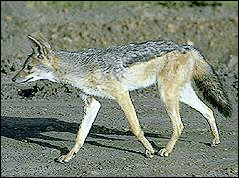

In [ ]:
import urllib.request

with (
    urllib.request.urlopen("https://httpbin.org/image/jpeg") as r,
    open("./test.jpg", "wb") as f,
):
    f.write(r.read())

# IPython で画像を表示
from IPython.display import Image, display_jpeg
display_jpeg(Image('test.jpg'))

`GET` リクエストでパラメータを渡すには、URL のクエリ文字列を使う。`urllib.parse.urlencode()` を使うと、辞書やタプルのリストから安全にクエリ文字列を組み立てることができる。

次のコードは、httpbin.org が提供する Web API において、`GET` リクエストをパラメータ付きで発行する例である。リクエスト時のクエリ文字列がレスポンスボディの JSON で `args` キーに格納されて返される。

In [ ]:
from urllib.parse import urlencode
import urllib.request
import json

endpoint = "https://httpbin.org/get"
params = {"name": "Taro", "age": 20}
url = urllib.request.Request('{}?{}'.format(endpoint, urllib.parse.urlencode(params)))
with urllib.request.urlopen(url) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["args"])

{'age': '20', 'name': 'Taro'}


`urllib.request.urlopen()` 関数を、第 1 引数に URL の文字列、第 2 引数にパラメータとなるデータを渡して呼び出したときは、内部生成される `urllib.request.Request` インスタンスの `method` 属性は `None` となり `get_method()` メソッドは `'POST'` を返す。デフォルトでは `'Content-Type: application/x-www-form-urlencoded'` ヘッダーが設定されるので、フォームデータを送信する `POST` リクエストは、URL の文字列 `url` とパラメータ `data` を渡して `urllib.request.urlopen(url, data)` と呼び出せばよい。

次のコードは、httpbin.org が提供する Web API において、`POST` リクエストを発行する例である。リクエスト時に送ったフォームデータがレスポンスボディの JSON で `form` キーに格納されて返される。

In [ ]:
import urllib.request
import json

# 送信するデータ
payload = {"name": "Taro", "age": 20}

# フォームデータに変換(バイト列)
data = urllib.parse.urlencode(payload).encode("utf-8")

url = "https://httpbin.org/post"
with urllib.request.urlopen(url, data) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["form"])

{'age': '20', 'name': 'Taro'}


リクエスト時にカスタムヘッダーを設定するには、`urllib.request.Request` のコンストラクタに `headers` 引数を渡す必要がある。したがって、`urllib.request.Request` インスタンスを直接生成して `urllib.request.urlopen()` に渡すことになる。

次のコードは、httpbin.org が提供する Web API において、`POST` リクエストをカスタムヘッダー付きで発行する例である。リクエスト時に送った JSON データがレスポンスボディの JSON で `data` キーに格納されて返される。

In [ ]:
import urllib.request
import json

# 送信するデータ
payload = {"name": "Taro", "age": 20}

# JSONに変換
data = json.dumps(payload).encode("utf-8")

# カスタムヘッダー
headers = {"Content-Type": "application/json"}

# リクエスト作成
url = "https://httpbin.org/post"
req = urllib.request.Request(url, data=data, headers=headers, method="POST")

# リクエスト送信
with urllib.request.urlopen(req) as res:
    body = res.read().decode("utf-8")

# レスポンスをJSONとしてパース
d = json.loads(body)
print(d["data"])

{"name": "Taro", "age": 20}


Cookie を使ったセッション管理
-----------------------------

`urllib.request.urlopen()` 関数は、Cookie を扱うことができない。このため、セッション維持を可能とする処理は、自作する必要がある。

`urllib.request.urlopen()` 関数は、HTTP、HTTPS といった TCP/IP アプリケーション層の処理を `urllib.request.OpenerDirector` クラスに依存している。

主な属性:

| 属性 | 意味 |
|:---|:---|
| `OpenerDirector.addheaders` | 追加のヘッダーフィールドをタプル `(header_name, header_value)` のリストで指定する |

主なメソッド:

| メソッド | 機能 | 戻り値 |
|:---|:---|:---|
| `OpenerDirector.open(url, data=None[, timeout])` | 「URL ハンドラ」を連鎖的に呼び出して URL を開く。引数、戻り値、および送出される<br /><br />例外は `urllib.request.urlopen()` 関数と同じ | `HTTPResponse` |

「URL ハンドラ」は、使用されるプロトコルに対応する処理が実装されたオブジェクトである。`urllib.request.OpenerDirector` クラスは、内部で URL ハンドラをどのように連鎖させるか、またどのようにエラーをリカバリするかを管理しており、それによって `open()` メソッドのふるまいを決めている。基本的な URL ハンドラの連鎖設定を保持する `urllib.request.OpenerDirector` オブジェクトは、次の関数を使用して取得することができる。

``` python
urllib.request.build_opener([handler, ...])
```

デフォルトでこの関数が返す `urllib.request.OpenerDirector` オブジェクトは、以下の全ての URL ハンドラの連鎖設定を保持する。

| URL ハンドラ | 機能 |
|:---|:---|
| `urllib.request.ProxyHandler(proxies=None)` | プロキシを通過してリクエストを送らせる |
| `urllib.request.UnknownHandler` | 未知のプロトコルの URL を開く |
| `urllib.request.HTTPHandler` | HTTP の URL を開く |
| `urllib.request.HTTPDefaultErrorHandler` | HTTP エラーレスポンスのデフォルトハンドラー |
| `urllib.request.HTTPRedirectHandler` | リダイレクションを扱う |
| `urllib.request.FTPHandler` | FTP の URL を開く |
| `urllib.request.FileHandler` | ローカルファイルを開く |
| `urllib.request.HTTPErrorProcessor` | HTTP エラーレスポンスの処理をする |
| `urllib.request.DataHandler` | [data URL](https://developer.mozilla.org/ja/docs/Web/URI/Reference/Schemes/data) を開く |
| `urllib.request.HTTPSHandler(debuglevel=0, context=None, check_hostname=None)` | HTTPS で URL を開く |

`urllib.request.build_opener()` 関数の呼び出しの際に URL ハンドラを渡す場合、もしそのクラスが上記に含まれるのであればデフォルトの連鎖設定にある URL ハンドラが置き換えられ、そうでなければデフォルトの連鎖設定に追加される。

例えば、`urllib.request.urlopen()` 関数のコードは、`context` 引数が渡された場合の処理のみを抜粋すると、次のようになっている。

``` python
def urlopen(url, data=None, timeout=socket._GLOBAL_DEFAULT_TIMEOUT, *, context=None):
    if context:
        https_handler = HTTPSHandler(context=context)
        opener = build_opener(https_handler)
    return opener.open(url, data, timeout)
```

`context` 引数が渡された場合、URL ハンドラの連鎖設定の中で `urllib.request.HTTPSHandler` が置き換えられた `urllib.request.OpenerDirector` オブジェクトを使用することがわかる。

以下の URL ハンドラは、デフォルトでは URL ハンドラの連鎖設定に含まれていない。

| URL ハンドラ | 機能 |
|:---|:---|
| `urllib.request.HTTPCookieProcessor(cookiejar=None)` | Cookie を扱う。デフォルトでは標準的な Cookie 処理（Cookie を保持して継続的に同じセッション<br /><br />を維持する）を行う |

したがって、Cookie を使用してセッション維持を可能とするには、`urllib.request.HTTPCookieProcessor` のインスタンスを、`urllib.request.build_opener()` 関数に渡せばよい（ハンドラが連鎖設定に追加され、`open()` メソッド使用時に呼び出されるようになる）。

次のサイトは、Heroku が提供するシンプルな認証のテストページで、ユーザー名とパスワードが `'tomsmith'`と `'SuperSecretPassword!'` に決まっている。ログインに成功すると、ログイン後のページにリダイレクトされるため、ログインの流れ全体をテストするのに適している。

  * https://the-internet.herokuapp.com/login

このテストページのフォームは次のようになっている。

``` html
<form name="login" id="login" action="/authenticate" method="post" >
   <div class="row">
    <div class="large-6 small-12 columns">
      <label for="username">Username</label>
      <input type="text" name="username" id="username" />
    </div>
  </div>
  <div class="row">
    <div class="large-6 small-12 columns">
      <label for="password">Password</label>
      <input type="password" name="password" id="password" />
    </div>
  </div>
    <button class="radius" type="submit"><i class="fa fa-2x fa-sign-in"> Login</i></button>
</form>
```

したがって、認証をパスするには `https://the-internet.herokuapp.com/authenticate` に対し `POST` リクエストでフォームデータを送信すればよい。コードは以下のようになる。

In [ ]:
import urllib.request
import urllib.parse
import html5lib

# Cookie を扱うハンドラを作成
cookie_handler = urllib.request.HTTPCookieProcessor()

# opener を構築（User-Agent も設定可能）
opener = urllib.request.build_opener(cookie_handler)
opener.addheaders = [('User-Agent', 'Mozilla/5.0 (compatible; Python urllib)')]

# ログインデータの準備
form_data = {
    'username': 'tomsmith',
    'password': 'SuperSecretPassword!'
}
encoded_data = urllib.parse.urlencode(form_data).encode('utf-8')

# ログインリクエスト（POST）
login_url = "https://the-internet.herokuapp.com/authenticate"
login_request = urllib.request.Request(login_url, data=encoded_data, method='POST')
login_response = opener.open(login_request)

# ログイン後のページへ遷移
assert login_response.url == "https://the-internet.herokuapp.com/secure"

# セキュアページの内容
secure_response = opener.open(login_response.url)
secure_content = secure_response.read().decode('utf-8')

# html5lib でセキュアページに表示されるメッセージを取得
doc = html5lib.parse(secure_content, namespaceHTMLElements=False)
messages = doc.find('.//h4')
print("メッセージ:", messages.text.strip())

メッセージ: Welcome to the Secure Area. When you are done click logout below.
